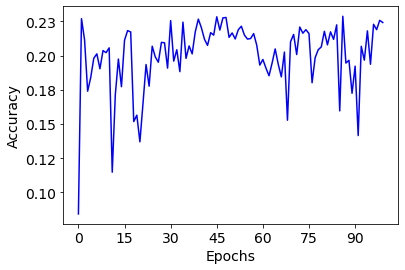

In [128]:
import matplotlib
import matplotlib.pyplot as plt

from turtle import color
from ray.tune import ExperimentAnalysis
from matplotlib.ticker import MaxNLocator

import pandas as pd
from torch import tensor
def plot(show_ECE=0, specific="", experiment_name="a1", save = False, save_path = "plot.svg"):
    analysis = ExperimentAnalysis("./results/"+experiment_name)
    ax = None
    dfs = analysis.trial_dataframes
    for k, d in list(dfs.items())[:]:
        if specific != "":
            if not specific in k: continue
        if "v01" in k:
            if show_ECE == 1:
                ax = d.ece.plot(ax=ax, legend=False, color="red")
            elif show_ECE == 0:
                ax = d.accuracy.plot(ax=ax, legend=False, color="red")
            else:
                ax = pd.Series([float(eval(i)) for i in d.example_loss]).plot(ax=ax, legend=False, color="red")
        else:
            if show_ECE == 1:
                ax = d.ece.plot(ax=ax, legend=False, color="blue")
            elif show_ECE == 0:
                ax = d.accuracy.plot(ax=ax, legend=False, color="blue")
            else:
                ax = pd.Series([float(eval(i)) for i in d.example_loss]).plot(ax=ax, legend=False, color="blue")
    ax.set_xlabel("Epochs")
    if show_ECE == 1:
        ax.set_ylabel("ECE")
    elif show_ECE == 0:
        ax.set_ylabel("Accuracy")
    else:
        ax.set_ylabel("Example Loss")
    # set x axis to be integers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # set y-axis values to 2 decimal places
    ax.yaxis.set_major_formatter('{x:.2f}')

    if save:
        if show_ECE == 1:
            plt.savefig(save_path.replace(".svg", "_ece.svg"))
        elif show_ECE == 0:
            plt.savefig(save_path.replace(".svg", "_acc.svg"))
        plt.savefig(save_path, format="svg")


plot(
    show_ECE=0, # 1 for ECE, 0 for accuracy, 2 for loss_example
    specific="c70ef_00006",
    experiment_name="a1",
    save=True,
    #save_path = "accuracy_plot.svg"
)

In [119]:
experiment = "a1"

import torch
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ray.tune import ExperimentAnalysis
dfs = ExperimentAnalysis("./results/" + experiment).dataframe()
dfs = dfs.drop(columns=['timesteps_total','episodes_total', 'experiment_id','date',
'timestamp', 'pid', 'hostname', 'node_ip','time_since_restore', 'timesteps_since_restore', 
'warmup_time', 'logdir', 'example_loss', 'training_iteration', 'done', 'config/batch_size',
'time_this_iter_s','freqs','time_total_s', 'config/criterion', 

'config/model'])#'config/eps', 'config/lr', 'config/lr','iterations_since_restore','trial_id',

#dfs.sort_values("accuracy", ascending=False)
#dfs.sort_values("config/eps", ascending=False).head(10)
dfs

,accuracy,ece,trial_id,iterations_since_restore,config/eps,config/lr
0,0.2543,0.145766,c70ef_00000,100,0.00001,0.001
1,0.6085,0.059505,c70ef_00001,100,0.00010,0.001
2,0.7510,0.069356,c70ef_00002,100,0.00100,0.001
3,0.8244,0.095671,c70ef_00003,100,0.01000,0.001
4,0.8432,0.114922,c70ef_00004,100,0.05000,0.001
5,0.8148,0.149422,c70ef_00005,100,0.10000,0.001
6,0.2242,0.775648,c70ef_00006,100,0.20000,0.001
7,0.1439,0.856002,c70ef_00007,100,0.25000,0.001


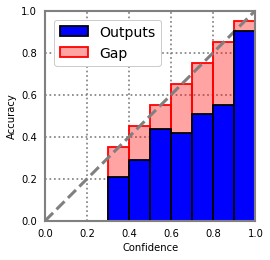

In [114]:
import torch
from reliabilityplot import plot_reliability
from ray.tune import ExperimentAnalysis
dfs = ExperimentAnalysis("./results/a1").dataframe()
nan = float("nan")
freqs = eval("torch."+(dfs["freqs"][4]))
plot_reliability(freqs)


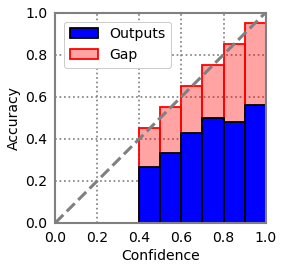

In [47]:
from ray.tune import ExperimentAnalysis
import torch
from reliabilityplot import plot_reliability
dfs = ExperimentAnalysis("./results/exp10").dataframe()
nan = float("nan")
freqs = eval("torch."+(dfs["freqs"][dfs[dfs["trial_id"]=="01e8f_00003"].index[0]]))
plot_reliability(freqs)

In [22]:
import library
import tune

import importlib
importlib.reload(library)
importlib.reload(tune)
import torch
import torch.nn as nn
import torchvision.models as models

device = "cuda"
model = models.resnet18(num_classes=10).to(device)
train_loader, test_loader = library.load_data(250)
for i in range(4):
    tune.train(model, torch.optim.Adam(model.parameters(), 0.0038), library.itakura_saito_loss_v01, train_loader, device, eps=0.7)
    print(tune.test(model, test_loader, device, ece=True, n_bins=10))

Files already downloaded and verified
(0.1229, 0.0010937657207250595, tensor([   nan,    nan,    nan,    nan,    nan,    nan, 0.5000, 0.5000, 0.0000,
        0.1429], device='cuda:0'))
(0.1387, 0.0008614913676865399, tensor([   nan,    nan,    nan,    nan,    nan,    nan, 0.3333, 0.0000, 0.0000,
        0.0000], device='cuda:0'))
(0.1339, 0.0006053505348972976, tensor([nan, nan, nan, nan, nan, nan, nan, 0., 0., 0.], device='cuda:0'))
(0.1481, 0.00026007028645835817, tensor([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan, 0.0000,
        0.3333], device='cuda:0'))


In [37]:
importlib.reload(library)
importlib.reload(tune)
tune.test(model, test_loader, device, ece=True, n_bins=10)

tensor(8518.3926, device='cuda:0') 10000


(0.1481,
 0.8518392443656921,
 tensor([   nan,    nan,    nan,    nan,    nan,    nan,    nan, 0.0000, 0.3333,
         0.1481], device='cuda:0'))

In [ ]:
import importlib
importlib.reload(library)
from reliabilityplot import plot_reliability
acc, ece, freqs = library.test(model, test_loader, device, ece=True)
print(acc, ece)
plot_reliability(freqs)

In [ ]:
import library
import tune

import torch
import torch.nn as nn
import torchvision.models as models

device = "cuda"
model2 = models.resnet152(num_classes=10).to(device)
train_loader, test_loader = library.load_data(250)
for i in range(20):
    tune.train(model2, torch.optim.Adam(model2.parameters(), 0.001), nn.CrossEntropyLoss(), train_loader, device)

In [ ]:
import importlib
importlib.reload(library)
acc, ece, freqs = library.test(model2, test_loader, device, ece=True)
print(acc, ece)
plot_reliability(freqs)

In [32]:
from ray.tune import ExperimentAnalysis
dfs = ExperimentAnalysis("./results/experiment2")
dfs.get_best_config(mode="max", metric="accuracy")

{'lr': 0.0038073857694810144,
 'criterion': <function library.itakura_saito_loss_v01(logits, labels, eps=0.0001)>,
 'model': <function torchvision.models.resnet.resnet152(*, weights: Optional[torchvision.models.resnet.ResNet152_Weights] = None, progress: bool = True, **kwargs: Any) -> torchvision.models.resnet.ResNet>,
 'batch_size': 250,
 'eps': 0.06685570567086357}

In [30]:
dfs = ExperimentAnalysis("./results/eps_experiment2").dataframe()
dfs = dfs.drop(columns=['timesteps_total','episodes_total', 'experiment_id','date', 'timestamp', 'pid', 
'hostname', 'node_ip','time_since_restore', 'timesteps_since_restore', 
'warmup_time', 'logdir', 'example_loss', 'config/eps', 'config/lr', 'training_iteration', 'done', 'config/batch_size', 'time_this_iter_s'])
dfs = ExperimentAnalysis("./results/eps_experiment2").trial_dataframes

eces = [d["ece"] for k, d in dfs.items()]
[eces[k][-20:].mean() for k in range(0, len(eces))]


[0.04381271600723262,
 0.08186247218400236,
 0.09336148370057341,
 0.06629177518188949,
 0.06963098719716068,
 0.03689850661903615,
 0.0,
 0.0]